<a href="https://colab.research.google.com/github/SankaineSanayet/dsc-visualizing-confusion-matrices-lab-repo/blob/master/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Confusion Matrices - Lab

## Introduction

In this lab, you'll build upon the previous lesson on confusion matrices and visualize a confusion matrix using `matplotlib`.

## Objectives

In this lab you will:  

- Create a confusion matrix from scratch
- Create a confusion matrix using scikit-learn
- Craft functions that visualize confusion matrices

## Confusion matrices

Recall that the confusion matrix represents the counts (or normalized counts) of our True Positives, False Positives, True Negatives, and False Negatives. This can further be visualized when analyzing the effectiveness of our classification algorithm.   
  
Here's an example of how a confusion matrix is displayed:
<img src="https://curriculum-content.s3.amazonaws.com/data-science/images/new_confusion_matrix_2.png" width="350">

With that, let's look at some code for generating this kind of visual.

## Create our model
As usual, we start by fitting a model to data by importing, normalizing, splitting into train and test sets and then calling your chosen algorithm. All you need to do is run the following cell. The code should be familiar to you.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('heart.csv')

# Define appropriate X and y
X = df[df.columns[:-1]]
y = df.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Normalize the data
X_train = X_train.copy()
X_test = X_test.copy()

for col in X_train.columns:
    X_train[col] = (X_train[col] - min(X_train[col]))/ (max(X_train[col]) - min(X_train[col]))

for col in X_test.columns:
    X_test[col] = (X_test[col] - min(X_test[col]))/ (max(X_test[col]) - min(X_test[col]))

# Fit a model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)

# Preview model params
print(model_log)

# Predict
y_hat_test = logreg.predict(X_test)

print("")
# Data preview
df.head()

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Create the confusion matrix

To gain a better understanding of confusion matrices, complete the `conf_matrix()` function in the cell below.  This function should:

* Take in two arguments:
    * `y_true`, an array of labels
    * `y_pred`, an array of model predictions
* Return a confusion matrix in the form of a dictionary, where the keys are `'TP', 'TN', 'FP', 'FN'`  

In [26]:
def conf_matrix(y_true, y_pred):
    cm = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}

    for ind, label in enumerate(y_true):
        pred = y_pred[ind]
        if label == 1:
            # CASE: TP
            if label == pred:
                cm['TP'] += 1
            # CASE: FN
            else:
                cm['FN'] += 1
        else:
            # CASE: TN
            if label == pred:
                cm['TN'] += 1
            # CASE: FP
            else:
                cm['FP'] += 1
    return cm
conf_matrix(y_test, y_hat_test)
# Expected output: {'TP': 38, 'TN': 26, 'FP': 7, 'FN': 5}

{'TP': 38, 'TN': 26, 'FP': 7, 'FN': 5}

## Check your work with `sklearn`

To check your work, make use of the `confusion_matrix()` function found in `sklearn.metrics` and make sure that `sklearn`'s results match up with your own from above.

- Import the `confusion_matrix()` function
- Use it to create a confusion matrix for `y_test` versus `y_hat_test`, as above

In [37]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix


# Print confusion matrix
cnf_matrix =confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[26  7]
 [ 5 38]]


## Create a nice visual

Luckily, sklearn recently implemented a `ConfusionMatrixDisplay` function that you can use to create a nice visual of your confusion matrices.

[Check out the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html), then visualize the confusion matrix from your logistic regression model on your test data.

In [28]:
# Import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


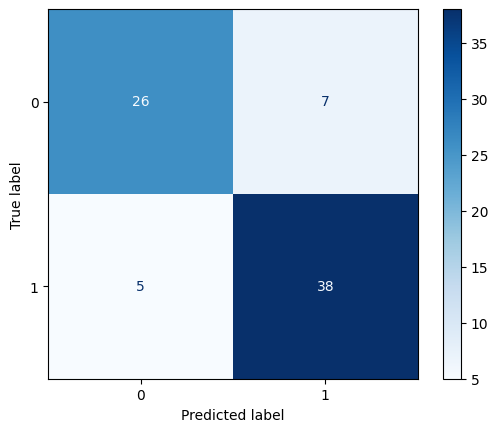

In [38]:

# Visualize your confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=model_log.classes_)
disp.plot(cmap=plt.cm.Blues)

## Summary

Well done! In this lab, you created a confusion matrix from scratch, then explored how to use a new function to visualize confusion matrices nicely!